# Исследование закономерностей, определяющие успешность игры

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

У нас есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Наша задача: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Изучение общей информации

Откроем файл и посмотрим общую информацию. Импортируем библиотеки pandas, matplotlib, seaborn, numpy для дальнейшей работы с данными. Прочитаем файл games.csv и сохраним его в переменную data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('games.csv', sep=',', decimal='.')
except: 
    data = pd.read_csv('http://localhost:8888/edit/Downloads/games.csv', sep=',', decimal='.')

In [3]:
# выведем на экран первые 10 строчек
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


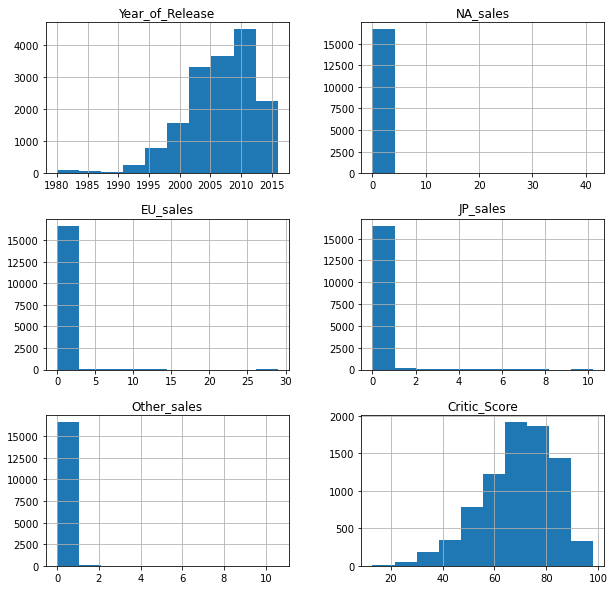

In [6]:
# посмотрим гистограммы
data.hist(figsize=(10,10))
plt.show()

**Вывод**

В исходном датафрейме есть неверные типы данных, много пропусков, отсутствует единий регистр написания в таблице, гистограммы далеки от нормального распределения.

### Предобработка данных

Приведем все названия к единому регистру написания.

In [7]:
data.columns = data.columns.str.lower()
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
# посмотрим первые пять строк
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изменим тип данных в столбце 'user_score'. Для остальных столбцов преобразования типа данных не требуется.

При попытке преобразовать тип данных столбца 'user_score' обнаружилась ошибка, которая указала, что в столбце есть значения 'tbd' (означающие “To Be Determined” - "будет определено позже"). Поэтому при преобразовании типа данных этого столбца в вещественный тип данных заменим все знаения 'tbd' на 'NaN'.

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
# проверим: изменился ли тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Посмотрим количество пропущенных значений для каждого столбца.

In [9]:
# методом isna() найдем все строки с пропусками для каждого столбца, а функция sum() их посчитает
data.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
rating             6766
critic_score       8578
user_score         9125
dtype: int64

In [10]:
# посмотрим количество пропусков в процентах
round(data.isna().sum().sort_values()/data.shape[0]*100, 2)

platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
name                0.01
genre               0.01
year_of_release     1.61
rating             40.48
critic_score       51.32
user_score         54.59
dtype: float64

В столбцах 'name' и 'genre' пропущены значения в 2 строках из 16 715 строк. Удаление такого количества строк не повредит дальнейшему анализу данных. Поэтому в столбцах 'name' и 'genre' можно удалить строки с пропусками.

In [11]:
data = data.dropna(subset=['name'])
data['name'].isna().sum()

0

In [12]:
data = data.dropna(subset=['genre'])
data['genre'].isna().sum()

0

В столбце 'year_of_release' пропуски имеются в 269 строках из 16 715 строк. Это составляет 1,61% от всех строк, поэтому можно удалить строки с пропусками в этом столбце.

In [13]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'].isna().sum()

0

In [14]:
# отсортируем датафрейм по датам
data.sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1764,kaboom!,2600,1980.0,misc,1.07,0.07,0.00,0.01,NaN,NaN,NaN
546,missile command,2600,1980.0,shooter,2.56,0.17,0.00,0.03,NaN,NaN,NaN
1968,defender,2600,1980.0,misc,0.99,0.05,0.00,0.01,NaN,NaN,NaN
6300,bridge,2600,1980.0,misc,0.25,0.02,0.00,0.00,NaN,NaN,NaN
5360,freeway,2600,1980.0,action,0.32,0.02,0.00,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10821,skylanders imaginators,xone,2016.0,platform,0.05,0.04,0.00,0.01,78.0,6.0,E10+
10825,one piece: burning blood,psv,2016.0,fighting,0.00,0.02,0.07,0.00,62.0,7.8,T
12156,assassin's creed chronicles,psv,2016.0,action,0.01,0.04,0.01,0.01,70.0,8.0,T
16248,azure striker gunvolt: striker pack,3ds,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,T


У нас есть игры от 1980 года по 2016 год. В сентябре 1994 года была основана организация ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. Поэтому посмотрим: какие игры были в период с 1980 года до 1994 года.

In [15]:
games_before1994 = data.query('year_of_release < 1994.0')
display(games_before1994.sort_values(by='year_of_release'))
display(games_before1994.info())
games_before1994.isna().sum().sort_values()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4019,ice hockey,2600,1980.0,sports,0.46,0.03,0.00,0.01,NaN,NaN,NaN
1968,defender,2600,1980.0,misc,0.99,0.05,0.00,0.01,NaN,NaN,NaN
2650,boxing,2600,1980.0,fighting,0.72,0.04,0.00,0.01,NaN,NaN,NaN
5360,freeway,2600,1980.0,action,0.32,0.02,0.00,0.00,NaN,NaN,NaN
546,missile command,2600,1980.0,shooter,2.56,0.17,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3841,mega man 6,nes,1993.0,platform,0.28,0.07,0.16,0.01,NaN,NaN,NaN
3774,winning post,snes,1993.0,sports,0.00,0.00,0.53,0.00,NaN,NaN,NaN
3770,virtual soccer,snes,1993.0,sports,0.00,0.00,0.53,0.00,NaN,NaN,NaN
3221,nobunaga no yabou: haouden,snes,1993.0,strategy,0.30,0.00,0.32,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 16207
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             365 non-null    object 
 1   platform         365 non-null    object 
 2   year_of_release  365 non-null    float64
 3   genre            365 non-null    object 
 4   na_sales         365 non-null    float64
 5   eu_sales         365 non-null    float64
 6   jp_sales         365 non-null    float64
 7   other_sales      365 non-null    float64
 8   critic_score     3 non-null      float64
 9   user_score       3 non-null      float64
 10  rating           4 non-null      object 
dtypes: float64(7), object(4)
memory usage: 34.2+ KB


None

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
rating             361
critic_score       362
user_score         362
dtype: int64

Так как в столбце 'rating' известны четыре значения, то посмотрим: какие данные есть по этим играм, которые имеею рейтинг организации ESRB.

In [16]:
display(games_before1994['rating'].unique())
games_before1994.query('rating == "E10+" or rating == "M" or rating == "T"').sort_values(by='year_of_release')

array([nan, 'T', 'M', 'E10+'], dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14470,alter ego,pc,1985.0,simulation,0.00,0.03,0.0,0.01,59.0,5.8,T
14621,simcity,pc,1988.0,simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+
2612,the 7th guest,pc,1992.0,adventure,0.02,0.77,0.0,0.00,NaN,NaN,T
14610,doom,pc,1992.0,shooter,0.02,0.00,0.0,0.00,85.0,8.2,M


Скорее всего это самые популярные четыре игры того времени, в том числе и в 1994 году. Поэтому им и был присвоен рейтинг. Но на основании этих данных нельзя судить по оставшимся 361 игре. Возможно в период с 1980 год по 1994 год были печатные издания, в которых писали отзывы на игры. Но вряд ли эти издания сохранились и по сей день. 

Посмотрим информацию по играм с 1994 года по 2016 год.

In [17]:
games_after1994 = data.query('year_of_release >= 1994.0')
display(games_after1994.sort_values(by='year_of_release'))
display(games_after1994.info())
games_after1994.isna().sum().sort_values()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5083,kileak: the dna imperative,ps,1994.0,shooter,0.08,0.06,0.21,0.02,NaN,NaN,NaN
14488,puzzle & action: tant-r,gen,1994.0,misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
4348,nhl faceoff,ps,1994.0,sports,0.25,0.17,0.00,0.03,NaN,NaN,NaN
7939,sd gundam gx,snes,1994.0,strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
5237,ganbare goemon 3: shishi jyuurokubei no karaku...,snes,1994.0,platform,0.00,0.00,0.36,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15782,taishou moebius line vitable,psv,2016.0,adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
7771,lego marvel's avengers,3ds,2016.0,action,0.07,0.09,0.01,0.01,60.0,7.1,E10+
7769,kan colle kai,psv,2016.0,action,0.00,0.00,0.19,0.00,NaN,NaN,NaN
13214,metroid prime: federation force,3ds,2016.0,action,0.02,0.01,0.01,0.00,64.0,5.1,T


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16079 non-null  object 
 1   platform         16079 non-null  object 
 2   year_of_release  16079 non-null  float64
 3   genre            16079 non-null  object 
 4   na_sales         16079 non-null  float64
 5   eu_sales         16079 non-null  float64
 6   jp_sales         16079 non-null  float64
 7   other_sales      16079 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9764 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


None

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating             6315
critic_score       8099
user_score         8619
dtype: int64

Кроме организации ESRB существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии. В связи с этим можно предположить, что пропуски в столбце 'rating' возникли из-за того, что у этих игр другая рейтинговая классификация. Поэтому можно заменить пропуски в столбце 'rating' на 'RP' (это означает, что рейтинг в ожидании).

In [18]:
data['rating'] = data['rating'].fillna('RP')
# проверим замену, для этого посмотрим уникальные значения в столбце
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

Так как в столбце 'rating' мы заменили пропуски на значения 'RP', тогда заменим пропуски в столбцах 'critic_score' и 'user_score' заменим на значения '-1' в тех строках, которые соответсвуют строкам, где есть значение 'RP'. Таким образом это не помешает дальнейшему анализу данных.

In [19]:
data.loc[(data['rating'] == "RP") & (data['critic_score'].isna()), 'critic_score'] = data['critic_score'].fillna(-1)
data.loc[(data['rating'] == "RP") & (data['user_score'].isna()), 'user_score'] = data['user_score'].fillna(-1)

# посмотрим количество оставшихся пропусков 
data.isna().sum().sort_values() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
critic_score       1866
user_score         2388
dtype: int64

Такое количество пропусков в столбцах 'critic_score' и 'user_score' вероятно возникло из-за того, что не каждый игрок оценивал игру либо эти пропуски получились в результате технических ошибок (например, во время записи данных или считывания). Поэтому оставшиеся пропуски в столбцах 'critic_score' и 'user_score' тоже заменим на значение '-1'.

In [20]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

# проверим наличие пропусков
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Посчитаем суммарные продажи во всех регионах и запишем их в столбец 'total_sales'.

In [21]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
# выведем первые пять строк
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38


### Исследовательский анализ данных

Посмотрим: сколько игр выпускалось в разные годы.

In [22]:
games = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games.columns = ['Год выпуска', 'Количество игр']
games

,Год выпуска,Количество игр
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


Покажем теперь это на графике.

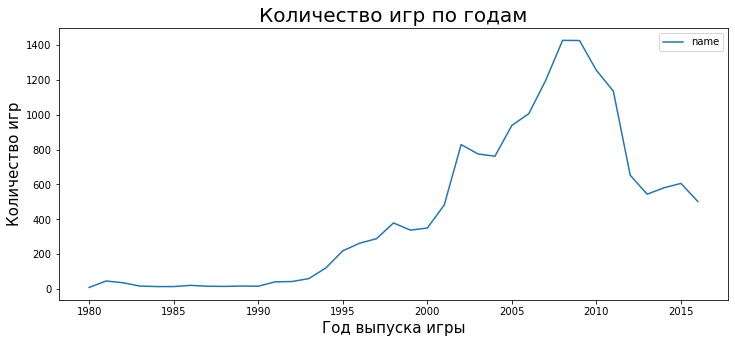

In [23]:
games = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

games.plot(x='year_of_release', y='name', figsize=(12,5))
plt.title('Количество игр по годам', fontsize = 20)
plt.xlabel('Год выпуска игры', fontsize = 15)
plt.ylabel('Количество игр', fontsize = 15)
plt.show()

**Вывод**

Активный рост количества выпускаемых игр мы наблюдаем с 2005 года. В периода с 1994 года по 2004 год можно увидеть как рост количества выпускаемых игр, так и их спад. Максимальное количество игр было выпущено в 2008 и 2009 годах (1427 игр и 1426 игр соответсвенно). После 2009 года количество выпускаемых игр за год снижается. 

Теперь посмотрим: как менялись продажи по платформам.

In [24]:
sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
sales.columns = ['Наименование платформы', 'Суммарные продажи']
sales.sort_values('Суммарные продажи')

,Наименование платформы,Суммарные продажи
14,pcfx,0.03
9,gg,0.04
1,3do,0.10
24,tg16,0.16
27,ws,1.42
12,ng,1.44
22,scd,1.86
3,dc,15.95
8,gen,28.35
21,sat,33.59


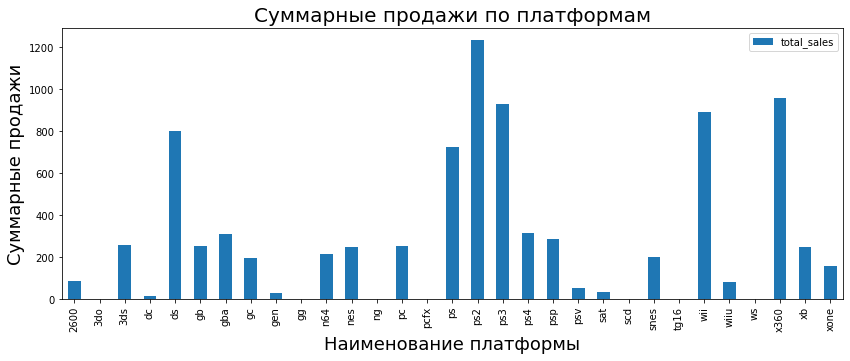

In [25]:
sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(14,5))
plt.title('Суммарные продажи по платформам', fontsize = 20)
plt.xlabel('Наименование платформы', fontsize = 18)
plt.ylabel('Суммарные продажи', fontsize = 18)
plt.show()

Из графика и таблицы видно, что максимальные суммарные продажи были по платформам DS (802.78 млн.), PS (727.58 млн.), ps2 (1233.56 млн.), PS3 (931.34 млн.), WII (891.18 млн.), X360 (961.24 млн.).

Посмотрим распределение платформ по годам.

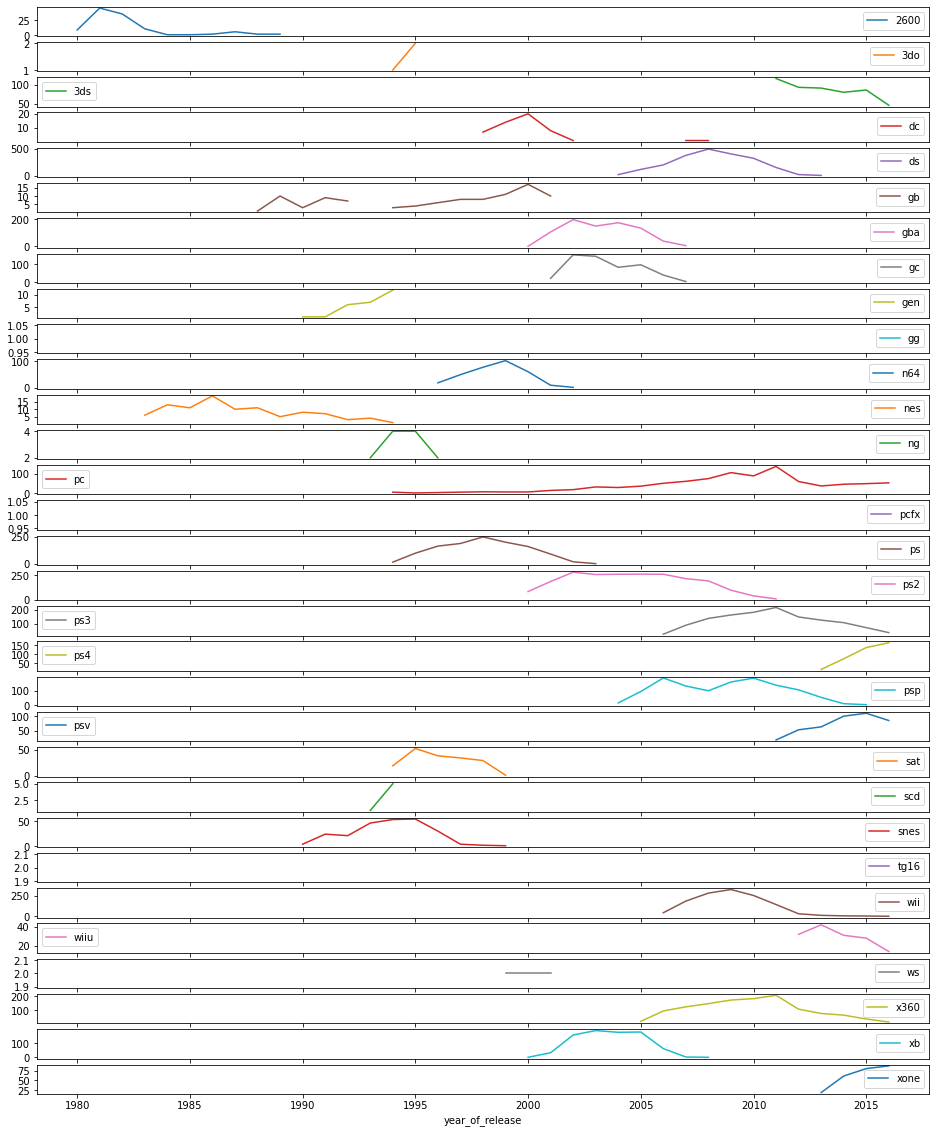

In [26]:
year_platform = data.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
year_platform.plot(subplots=True, figsize=(16, 20))
plt.show()

Судя по графику, можно сказать, что платформы в основном появлялись сроком от 5 до 10 лет. Некоторые плтформы существовали от года до четырех лет: WS, SCD, NG, 3DO, WIIU, SAT, GEN, DC. Платформа PC (она же персональный компьютер) имеет самый максимальный срок существования: с 1994 года по 2016 год.

Посмотрим, как распределялись суммарные продажи по годам.

In [27]:
sales_year = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
sales_year.columns = ['Год выпуска игр', 'Суммарные продажи']
sales_year.sort_values('Год выпуска игр')

,Год выпуска игр,Суммарные продажи
0,1980.0,11.38
1,1981.0,35.68
2,1982.0,28.88
3,1983.0,16.80
4,1984.0,50.35
5,1985.0,53.95
6,1986.0,37.08
7,1987.0,21.70
8,1988.0,47.21
9,1989.0,73.45


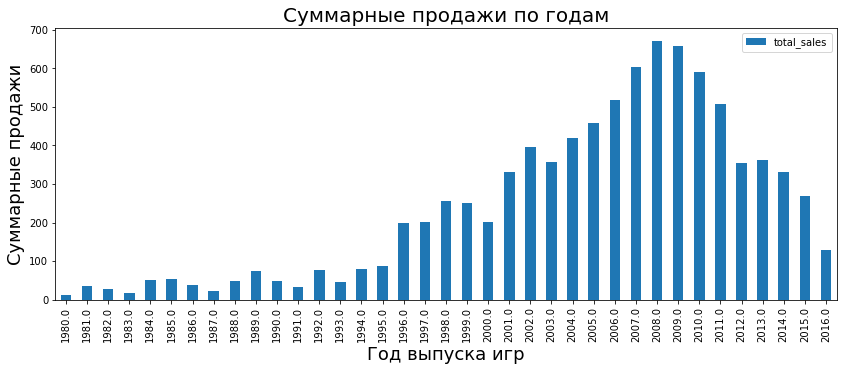

In [28]:
sales_year = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(14,5))
plt.title('Суммарные продажи по годам', fontsize = 20)
plt.xlabel('Год выпуска игр', fontsize = 18)
plt.ylabel('Суммарные продажи', fontsize = 18)
plt.show()

Пик суммарных продаж игр приходится на 2008 год. Далее из графика видно, что продажи снижаются.

**Вывод**

Так как компьютерные игры - это динамично меняющаяся индустрия, то для дальнейшего анализа данных актуальным периодом будет 2014-2016 гг. 

Сделаем таблицу с 2014 по 2016гг. 

In [29]:
games_with2014 = data.query('year_of_release >= 2014')
games_with2014.sort_values('year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5246,thief (2014),ps3,2014.0,action,0.10,0.17,0.02,0.05,-1.0,-1.0,RP,0.34
6628,just dance 2015,ps3,2014.0,misc,0.13,0.08,0.00,0.04,-1.0,6.8,E10+,0.25
16294,adventure time: the secret of the nameless,x360,2014.0,adventure,0.01,0.00,0.00,0.00,-1.0,-1.0,RP,0.01
6678,hatsune miku: project diva f 2nd,ps3,2014.0,misc,0.09,0.03,0.10,0.03,78.0,8.6,T,0.25
12502,super robot wars og saga masou kishin f: coffi...,ps3,2014.0,strategy,0.00,0.00,0.06,0.00,-1.0,-1.0,RP,0.06


Посмотрим потенциально прибыльные платформы

array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv',
       'psp'], dtype=object)

platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
Name: total_sales, dtype: float64

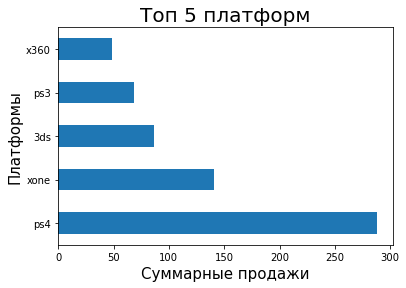

In [30]:
display(games_with2014['platform'].unique())
platform_top = games_with2014.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_top = platform_top.iloc[0:5]
display(platform_top)

platform_top.plot(kind='barh').set_title('Топ 5 платформ', fontsize = 20)
plt.xlabel('Суммарные продажи', fontsize = 15)
plt.ylabel('Платформы', fontsize = 15)
plt.show()

In [31]:
# посмотрим топ платформ по количеству игр
platform_top_games = games_with2014.groupby('platform')['name'].count().sort_values(ascending=False)
platform_top_games = platform_top_games.iloc[0:5]
platform_top_games

platform
ps4     376
psv     295
xone    228
ps3     219
3ds     212
Name: name, dtype: int64

Посмотрим диаграммы размаха по суммарным продажам в разбивке по платформам за период с 2014 по 2016 гг.

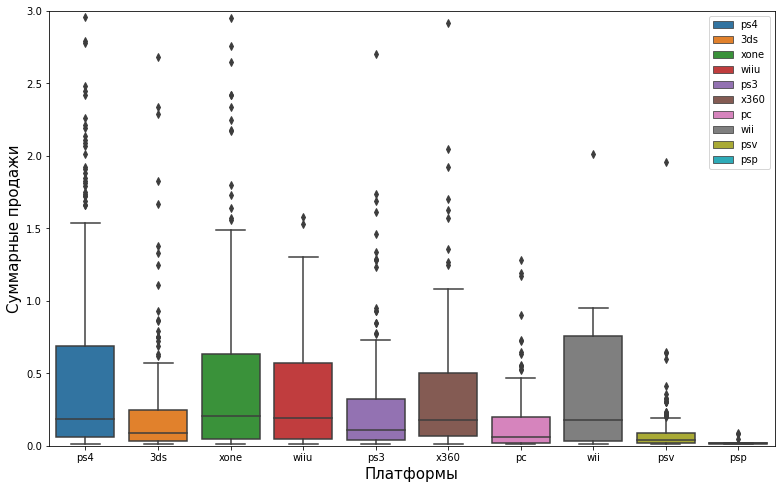

In [32]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=games_with2014, x='platform', y='total_sales', hue='platform', dodge=False)
plt.xlabel('Платформы', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.ylim(0,3)
plt.legend(loc='upper right')
plt.show()

**Вывод**

Самые маленькие суммарные продажи на платформах PSP и PSV. А самые максимальные сумарные продажи на платформах WII, PS4, XOne, WIIU и X360. Немного ниже суммарные продажи на платформе PS3, 3DS и PC. Также на платформах PSP и PSV величина суммарных продаж более однородна, в отличии от платформ X360, PS4, XOne, WII, WIIU, PS3.

Посмотрим: как влияют отзывы пользователей и критиков на продажи игр для платформы PS4 (возьмем эту платформу, потому что количество игр для нее составляет 376 игр).

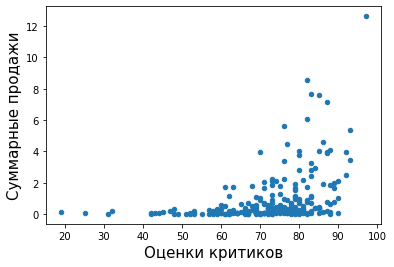

0.402661410681041

In [33]:
games_with2014.query('platform == "ps4" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсонаи
games_with2014.query('platform == "ps4" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

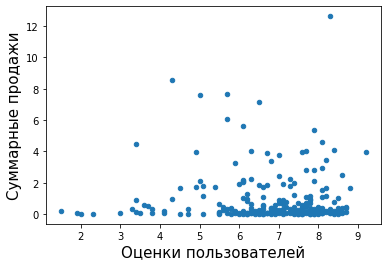

-0.040131589472697286

In [34]:
games_with2014.query('platform == "ps4" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "ps4" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

**Вывод**

Для платформы PS4 на графике зависимости суммарных продаж от оценки критиков видно, что есть небольшая зависимость: с более большей оценкой критиков растет и продажа игр. Хотя коэффициент корреляции равный 0,4 указывает, что оценки критиков слабо влияют на суммарные продажи игр для платформы PS4. Ситуация же с зависимостью суммарных продаж от оценки пользователей другая: на графике эта зависимость просматривается (игры чаще покупают, если есть оценки пользователей), но коэффициент корреляции равный -0,04 говорит о том, что зависимость суммарных продаж от оценки пользователей практически отсутствует.

Подобным образом посмотрим зависимость суммарных продаж на других платформах.

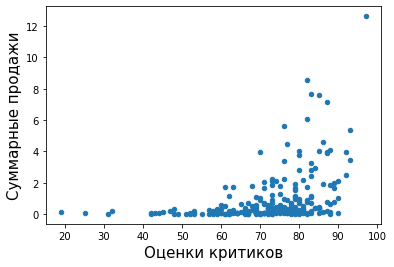

0.402661410681041

In [35]:
games_with2014.query('platform == "ps4" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "ps4" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

Подобным образом посмотрим зависимость суммарных продаж на других платформах.

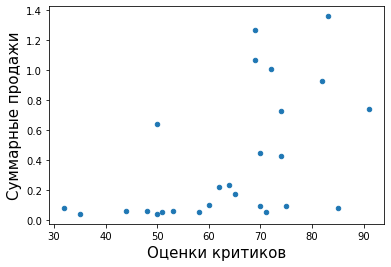

0.5257228356581521

In [36]:
# диаграмма рассеяния для платформы Х360
games_with2014.query('platform == "x360" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "x360" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

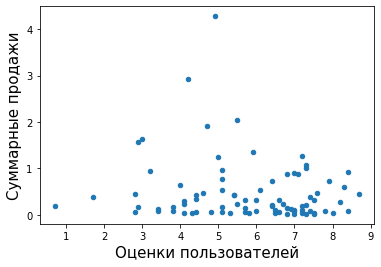

-0.13844457094566506

In [37]:
# диаграмма рассеяния для платформы Х360
games_with2014.query('platform == "x360" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "x360" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

Для платформы Х360 коэффициенты корреляции 0,53 (зависимость продаж от оценки критиков) и -0,12 (зависимость продаж от оценка пользователей), что указывает на среднюю зависимость роста продаж от оценок критиков и очень слабую зависимость от оценок пользователей. На графиках также наблюдается небольшая зависимость роста продаж от оценок критиков и пользователей.

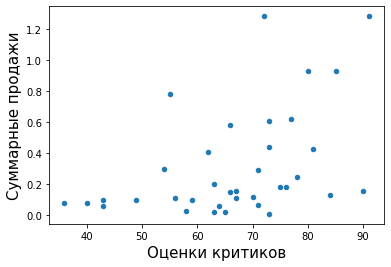

0.44657460493190715

In [38]:
# диаграмма рассеяния для платформы PS3
games_with2014.query('platform == "ps3" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "ps3" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

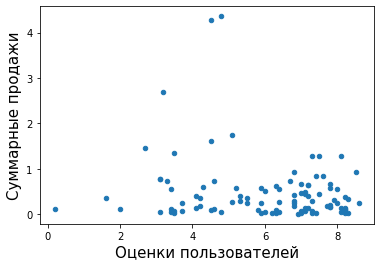

-0.16676141347662105

In [39]:
# диаграмма рассеяния для платформы PS3
games_with2014.query('platform == "ps3" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "ps3" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

Для платформы PS3 коэффициенты корреляции 0,45 (зависимость продаж от оценки критиков) и -0,17 (зависимость продаж от оценка пользователей), что указывает на слабую зависимость роста продаж от оценок критиков и очень слабую зависимость от оценок пользователей. На графиках также наблюдается небольшая зависимость роста продаж от оценок критиков и пользователей.

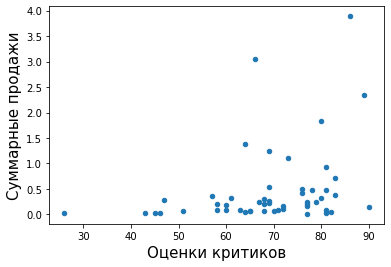

0.31411749286905094

In [40]:
# диаграмма рассеяния для платформы 3DS
games_with2014.query('platform == "3ds"and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "3ds" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

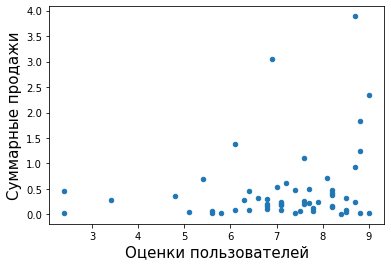

0.2151932718527028

In [41]:
# диаграмма рассеяния для платформы 3DS
games_with2014.query('platform == "3ds" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "3ds" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

Для платформы 3DS коэффициенты корреляции 0,31 (зависимость продаж от оценки критиков) и 0,21 (зависимость продаж от оценка пользователей), что указывает на слабую зависимость роста продаж от оценок критиков и пользователей. На графиках также наблюдается небольшая зависимость роста продаж от оценок критиков и пользователей.

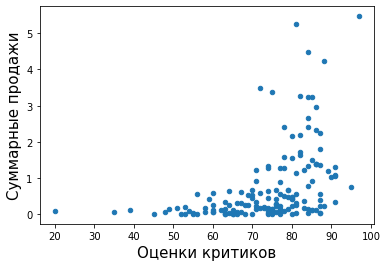

0.428676943703332

In [42]:
# диаграмма рассеяния для платформы XOne
games_with2014.query('platform == "xone" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "xone" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

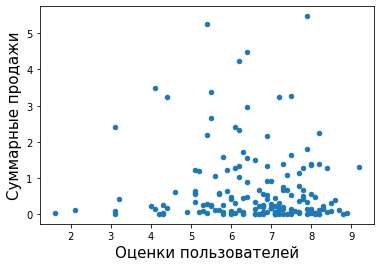

-0.07038392806475818

In [43]:
# диаграмма рассеяния для платформы XOne
games_with2014.query('platform == "xone" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "xone" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

Для платформы ХOne коэффициенты корреляции 0,43 (зависимость продаж от оценки критиков) и -0,07 (зависимость продаж от оценка пользователей), что указывает на слабую зависимость роста продаж от оценок критиков и практически отсутствующую зависимость от оценок пользователей. На графиках также наблюдается небольшая зависимость роста продаж от оценок критиков и пользователей.

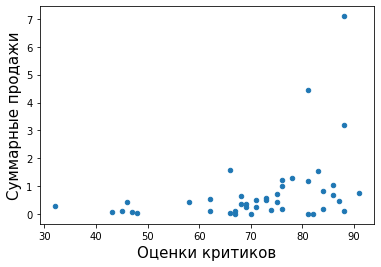

0.37020141248088406

In [44]:
# диаграмма рассеяния для платформы WIIU
games_with2014.query('platform == "wiiu" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "wiiu" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

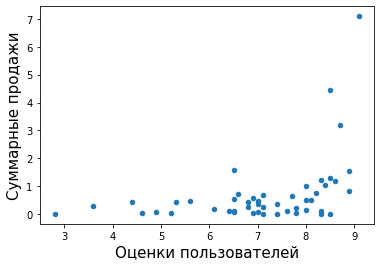

0.40792645792170784

In [45]:
# диаграмма рассеяния для платформы WIIU
games_with2014.query('platform == "wiiu" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "wiiu" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

Для платформы WIIU коэффициенты корреляции 0,37 (зависимость продаж от оценки критиков) и 0,41 (зависимость продаж от оценка пользователей), что указывает на слабую зависимость роста продаж от оценок критиков и пользователей. На графиках также наблюдается небольшая зависимость роста продаж от оценок критиков и пользователей.

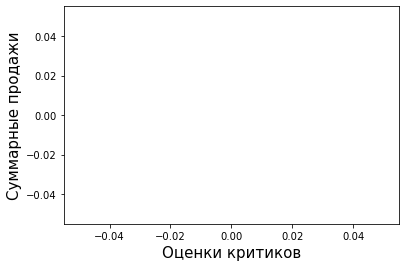

nan

In [46]:
# диаграмма рассеяния для платформы WII
games_with2014.query('platform == "wii" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "wii" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

In [47]:
# посмотрим количество игр на платформе WII в период с 2014 г по 2016г
games_with2014.query('platform == "wii" and critic_score != -1')['name'].count()

0

In [48]:
games_with2014.query('platform == "wii"')['name'].count()

11

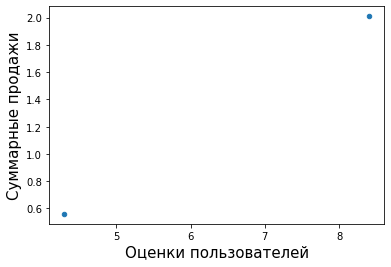

1.0

In [49]:
# диаграмма рассеяния для платформы WII
games_with2014.query('platform == "wii" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "wii" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

In [50]:
# посмотрим количество игр, выпущенных для платформы WII
games_with2014.query('platform == "wii" and user_score != -1')['name'].count()

2

Для платформы WII коэффициент корреляции зависимости продаж от оценки критиков отсутствует, потому что в период с 2014 г по 2016 г было выпущено 11 игр и в исходных данных пропущены значения оценок критиков этих игр. Коэффициент корреляции зависимости суммарных продаж от оценок пользователей для платформы WII равен 1, что указывает на высокую зависимость. Но насколько это верно, сложно судить, так как за актуальный период всего две игры имеют оценки пользователей.

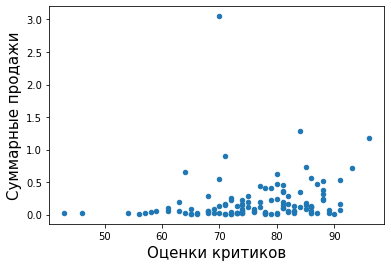

0.17463413769350025

In [51]:
# диаграмма рассеяния для платформы PC
games_with2014.query('platform == "pc" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "pc" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

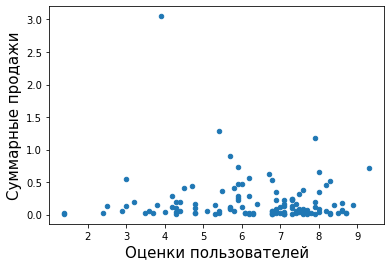

-0.07159665703472454

In [52]:
# диаграмма рассеяния для платформы PC
games_with2014.query('platform == "pc" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "pc" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

Для платформы PC коэффициенты корреляции 0,17 (зависимость продаж от оценки критиков) и -0,07 (зависимость продаж от оценка пользователей), что указывает на слабую зависимость роста продаж от оценок критиков и практически отсутствующую зависимость от оценок пользователей. На графиках также наблюдается небольшая зависимость роста продаж от оценок критиков и пользователей.

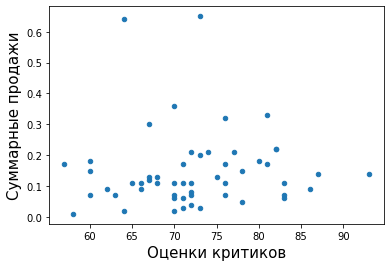

0.04266490657009527

In [53]:
# диаграмма рассеяния для платформы PSV
games_with2014.query('platform == "psv" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "psv" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

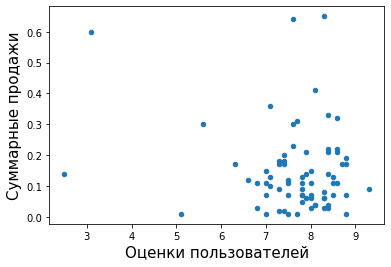

-0.16845504978064438

In [54]:
# диаграмма рассеяния для платформы PSV
games_with2014.query('platform == "psv" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "psv" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

Для платформы PSV коэффициенты корреляции 0,04 (зависимость продаж от оценки критиков) и -0,17 (зависимость продаж от оценка пользователей), что указывает на практически отсутствующую зависимость роста продаж от оценок критиков и очень слабую зависимость от оценок пользователей. На графиках также наблюдается слабая зависимость роста продаж от оценок критиков и пользователей.

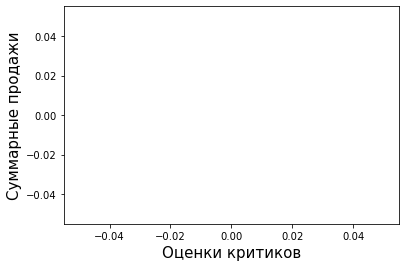

nan

In [55]:
# диаграмма рассеяния для платформы PSP
games_with2014.query('platform == "psp" and critic_score != -1').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "psp" and critic_score != -1')['total_sales'].corr(games_with2014['critic_score'])

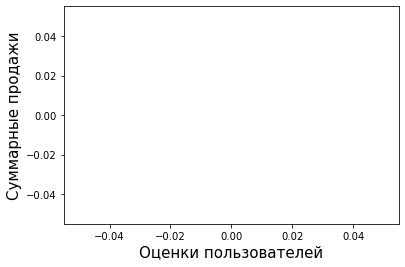

nan

In [56]:
# диаграмма рассеяния для платформы PSP
games_with2014.query('platform == "psp" and user_score != -1').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки пользователей', fontsize = 15)
plt.ylabel('Суммарные продажи', fontsize = 15)
plt.show()
# найдем коэффициент корреляции Пирсона
games_with2014.query('platform == "psp" and user_score != -1')['total_sales'].corr(games_with2014['user_score'])

In [57]:
# посмотрим количество игр, выпущенных для платформы PSP
display(games_with2014.query('platform == "psp"')['name'].count())
display(games_with2014.query('platform == "psp" and critic_score != -1')['name'].count())
games_with2014.query('platform == "psp" and user_score != -1')['name'].count()

13

0

0

Для платформы PSP коэффициенты корреляции отсутствуют, потому что в период с 2014 г по 2016 г всего выпущено 13 игр и в исходных данных оценки критиков и пользователей по этим играм пропущены.

**Вывод**

В результате получается, что зависимость суммарных продаж от оценок критиков и пользователей для разных платформ слабая или практически отсутствует. Но среди платформ выделяются игровые платформы Х360, WII и PSP. Для платформы Х360 коэффициент корреляции зависимости продаж от оценки критиков равен 0,53 указывает на среднюю зависимость. А для платформы WII коэффициент корреляции зависимости продаж от оценки критиков отсутствует, потому что в период с 2014 г по 2016 г было выпущено 11 игр и в исходных данных пропущены значения оценок критиков этих игр. Для платформы PSP коэффициенты корреляции отсутствуют, потому что в период с 2014 г по 2016 г всего выпущено 13 игр и в исходных данных оценки критиков и пользователей по этим играм пропущены. Для остальных платформ коэффициент корреляции зависимости продаж от оценки критиков лежит в диапазоне 0,17-0,45. 
    
Что касается коэффициента корреляции зависимости продаж от оценки пользователей, то значения этого коэффициента для платформ PS4, РС, XOne, X360, PSV и 3DS лежат в диапазоне от -0,04 до -0,17. Отрицательный коэффициент корреляции говорит об обратной зависимости величин, т.е. рост суммарных продаж связан с уменьшением оценок пользователей. Но так как значения корэффициента корреляции практически рядом с нулем, то эта зависимость практически отсутствует.
    
Для платформы WII коэффициент корреляции зависимости суммарных продаж от оценок пользователей равен 1, что указывает на высокую зависимость. Но насколько это верно, сложно судить, так как за актуальный период всего две игры имеют оценки пользователей. А для платформы WIIU коэффициент корреляции суммарных продаж от оценок пользователей составляет 0,41, что указывает на слабую зависимость.

Теперь посмотрим на общее распределение игр по жанрам.

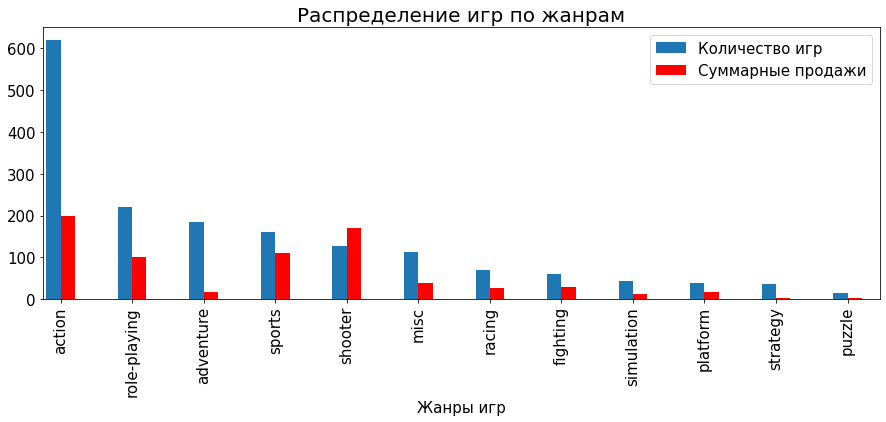

In [58]:
genre_games = games_with2014.groupby('genre').agg(
    {'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)
plt.rc('font', size=15)
ax = plt.gca()
plot1 = genre_games['name']
plot1.plot(kind='bar', figsize=(15,4), ax=ax, width=0.2, position=1)
plot2 = genre_games['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ax=ax, width=0.2, color='red', position=0)
ax.legend(['Количество игр', 'Суммарные продажи'])
plt.title('Распределение игр по жанрам', fontsize = 20)
plt.xlabel('Жанры игр', fontsize = 15)
plt.show()

Судя по графику самые высокие суммарные продажи у жанра action обусловлены тем, что в этом жанре выпускает очень много игр по сравнению с другими жанрами. Далее высокие суммарные продажи наблюдаются в жанрах shooter, role-playing и sports, а самые низкие - puzzle, strategy, adventure и simulation. Не смотря на то, что в жанре adventure количество игр больше, чем в жанре shooter, суммарные продажи в этом жанре низкие.

Для того, чтобы понять: какой жанр игр самый прибыльный, найдем среднее значение продаж игр в каждом жанре.

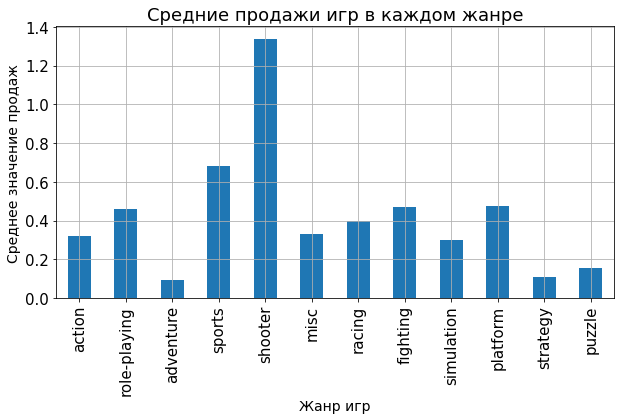

In [59]:
genre_games['mean'] = genre_games['total_sales'] / genre_games['name']
genre_games['mean'].plot(kind='bar', figsize=(10, 5), grid=True)
plt.rc('font', size=14)
plt.title('Средние продажи игр в каждом жанре', fontsize = 18)
plt.xlabel('Жанр игр', fontsize = 14)
plt.ylabel('Среднее значение продаж', fontsize = 14)
plt.show()

**Вывод**

Самым прибыльным жанром игр является shooter, хоть и выпускается в этом жанре игр намного меньше, чем в жанре action. Далее по прибыльности идут жанры platform, sports, role-playing, simulation и action. Самые высокие суммарные продажи у жанра action обусловлены тем, что в этом жанре выпускает очень много игр по сравнению с другими жанрами. Далее высокие суммарные продажи наблюдаются в жанрах shooter, role-playing и sports, а самые низкие - puzzle, strategy, adventure и simulation. Не смотря на то, что в жанре adventure количество игр больше, чем в жанре shooter, суммарные продажи в этом жанре низкие.

### Портрет пользователя каждого региона

Посмотрим пять самых популярных игровых платформ в период с 2014 по 2016 годы.

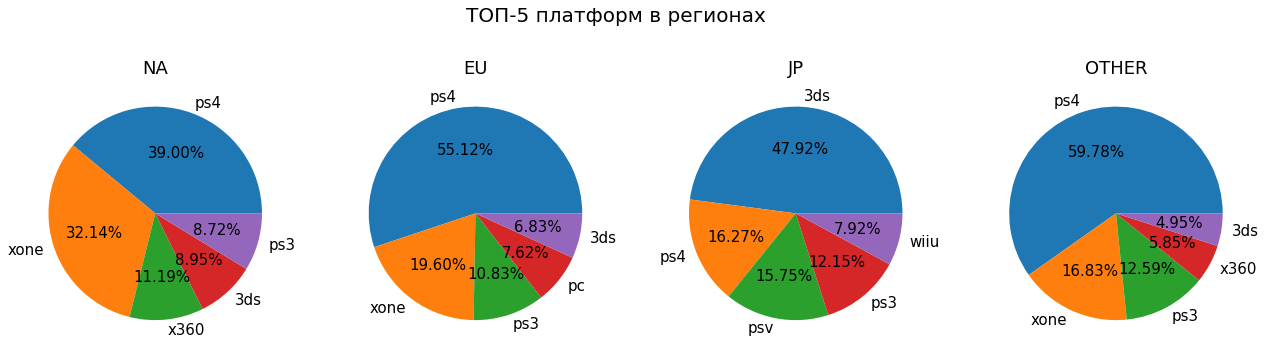

In [60]:
# задаем список регионов
countries = games_with2014.columns[4:8]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 4, figsize=(22, 6))
fig.suptitle('ТОП-5 платформ в регионах', fontsize=20)
plt.rc('font', size=15)
for i in range(4):
  # выберем 5 самых продающих платформ
  df_i = (games_with2014.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%.2f%%')
  # зададим название региона
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()    

**Вывод**

В Северной Америке самые популярные платформы - это PS4 (39%), XOne (32.14%), X360 (11.19%), 3DS (8.95%) и PS3 (8.72%). В Европе большей популярностью пользуется платформа PS4 (55.12%) и только потом уже XOne (19.60%), PS3 (10.83%), PC (7.62%) и 3DS (6.83%). В других странах распределение платформ по популярности такое же, как и в Северной Америке, только долевое соотношение другое: PS4 (59.78%), XOne (16.83%), PS3 (12.59%), X360 (5.85%) и 3DS (4.95%). А в Японии популярностью пользуются платформы 3DS (47.92%), PS4 (16.27%), PSV (15.75%), PS3 (12.15% ) и WIIU (7.92%).

Посмотрим пять самых популярных игровых жанров в период с 2014 по 2016 годы.

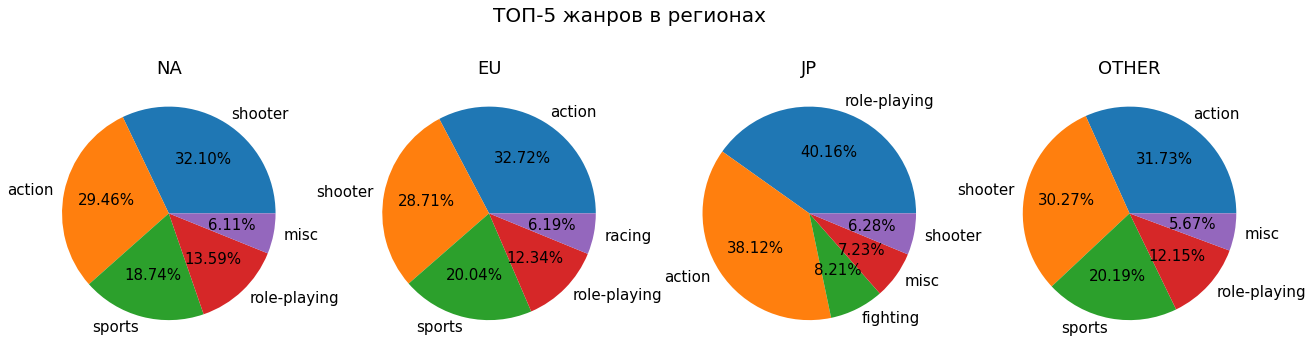

In [61]:
# задаем список регионов
countries = games_with2014.columns[4:8]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 4, figsize=(22, 6))
fig.suptitle('ТОП-5 жанров в регионах', fontsize=20)
plt.rc('font', size=15)
for i in range(4):
  # выберем 5 самых популярных жанров
  df_i = (games_with2014.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%.2f%%')
  # зададим название региона
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show() 

**Вывод**
    
В Северной Америке наибольшей популярностью пользуется жанр shooter (32.10%), а вот в Европе и других странах основной популярностью пользуется жанр action (32.72% и 31.73% соответственно). В Японии жанр action занимает 38.12% от популярных жанров. Наибольшей популярностью в Японии пользуется жанр role_playing (40.16%). Жанры misc (7.23%), shooter (6.28%) и fighting (8.21%) также входят в топ-5 популярных жанров в Японии. В Северной Америке второе место по популярности занимает жанр action (29.46%), а в Европе и других странах на втором месте по популярности занимет жанр shooter (28.71% и 30.27% соответственно), а на третьем месте - жанр sports (18.74%, 20.04% и 20.19% соответственно), на четвертом - жанр role_playing (13.59%, 12.34% и 12.15% соответственно). Также в Северной Америке и других странах популярен жанр misc (6.11% и 5.67% соответственно). А вот в Европе в топ-5 популярных жанров входит жанр racing (6.19%).

Посмотрим: влияет ли рейтинг ESRB на продажи в отдельном регионе.

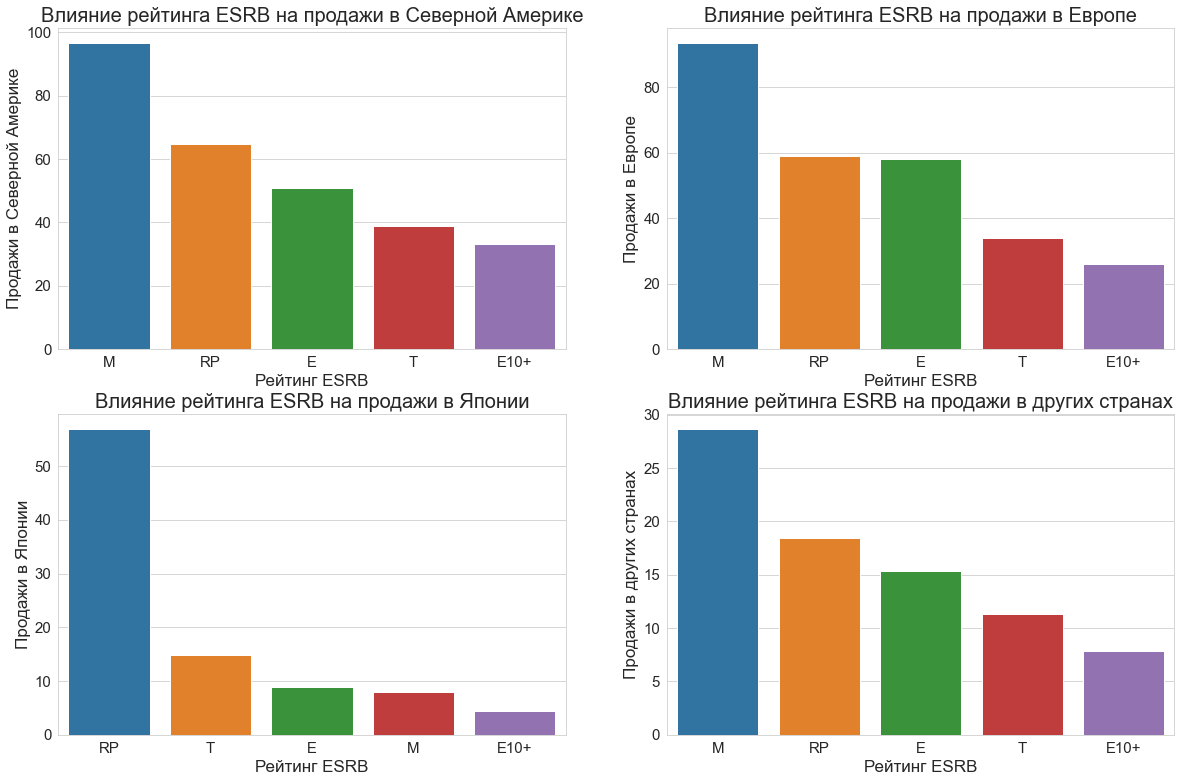

In [62]:
sns.set_style('whitegrid')
plt.rc('font', size=12)
plt.figure(figsize=(20, 13))
plt.rc('font', size=15)
# посмотрим влияние рейтинга ESRB на продажи в Северной Америке
plt.subplot(2, 2, 1)
rating_na = games_with2014.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
sns.barplot(x='rating', y='na_sales', data=rating_na)
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке', fontsize = 20)
plt.xlabel('Рейтинг ESRB', fontsize = 17)
plt.ylabel('Продажи в Северной Америке', fontsize = 17)
# посмотрим влияние рейтинга ESRB на продажи в Европе
plt.subplot(2, 2, 2)
rating_eu = games_with2014.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
sns.barplot(x='rating', y='eu_sales', data=rating_eu)
plt.title('Влияние рейтинга ESRB на продажи в Европе', fontsize = 20)
plt.xlabel('Рейтинг ESRB', fontsize = 17)
plt.ylabel('Продажи в Европе', fontsize = 17)
# посмотрим влияние рейтинга ESRB на продажи в Японии
plt.subplot(2, 2, 3)
rating_jp = games_with2014.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
sns.barplot(x='rating', y='jp_sales', data=rating_jp)
plt.title('Влияние рейтинга ESRB на продажи в Японии', fontsize = 20)
plt.xlabel('Рейтинг ESRB', fontsize = 17)
plt.ylabel('Продажи в Японии', fontsize = 17)
# посмотрим влияние рейтинга ESRB на продажи в других странах
plt.subplot(2, 2, 4)
rating_other = games_with2014.pivot_table(
    index='rating', values='other_sales', aggfunc='sum').reset_index().sort_values(by='other_sales', ascending=False)
sns.barplot(x='rating', y='other_sales', data=rating_other)
plt.title('Влияние рейтинга ESRB на продажи в других странах', fontsize = 20)
plt.xlabel('Рейтинг ESRB', fontsize = 17)
plt.ylabel('Продажи в других странах', fontsize = 17)

plt.show()

**Вывод**

В Северной Америке, Европе и других странах в основном покупают игры с рейтингом 'М' ('для взрослых'). А вот в Японии в основном покупают игры с рейтингом 'RP' ('рейтинг ожидается'). Скорее всего это связано с тем, что в Японии существует своя рейтинговая система, отличная от системы ESRB. Поэтому продажи с рейтингами 'E' ('для всех'), 'T' ('подросткам') 'M' ('для взрослых') практически на одном уровне и игры с этими рейтингами покупают немного чаще, чем с рейтингом 'Е10+'. Меньшего всего продаж в Японии игр с рейтингом 'E10+' ('для всех от 10 лет'). В Северной Америке, Европе и других странах почти одинаково покупают игры с рейтингами 'E' ('для всех') и 'RP' ('рейтинг ожидается'). Игры с рейтингом 'RP' вероятно классифицированы другими организациями, которые отвечают за присвоение рейтинга играм в других странах. Также в  Северной Америке, Европе и других странах меньше покупают игры с рейтингами 'Е10+' ('для всех от 10 лет') и 'T' ('подросткам').

### Проверка гипотез

Необходимо проверит две гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим первую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза будет звучать так:
- средние пользовательские рейтинги платформы Xbox One = средним пользовательским рейтингам платформы РС.

Альтернативная гипотеза:
- средние пользовательские рейтинги платформы Xbox One ≠ средним пользовательским рейтингам платформы РС.

alpha = 0.05

Так как надо проверить гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам, то воспользуемся методом scipy.stats.ttest_ind().

In [63]:
mean_xone = games_with2014[(games_with2014['platform'] == 'xone') & (games_with2014['user_score'] != -1)]['user_score']
mean_pc = games_with2014[(games_with2014['platform'] == 'pc') & (games_with2014['user_score'] != -1)]['user_score']
results = st.ttest_ind(mean_xone, mean_pc)

alpha = 0.05 

display(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.10450507919348415

Не получилось отвергнуть нулевую гипотезу


**Вывод**
    
Первую гипотезу (средние пользовательские рейтинги платформ Xbox One и PC одинаковые) не получилось отвергнуть, так как с вероятностью в 10% можно случайно получить незначительное различие между средними пользовательскими рейтингами платформ Xbox One и PC.

Проверим вторую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза будет звучать так:
- средние пользовательские рейтинги жанра Action = средним пользовательским рейтингам жанра Sports.

Альтернативная гипотеза:
- средние пользовательские рейтинги жанра Action ≠ средним пользовательским рейтингам жанра Sports.

alpha = 0.05

In [64]:
action = games_with2014[(games_with2014['genre'] == 'action') & (games_with2014['user_score'] != -1)]['user_score']
sports = games_with2014[(games_with2014['genre'] == 'sports') & (games_with2014['user_score'] != -1)]['user_score']
results = st.ttest_ind(action, sports)

alpha = 0.05 

display(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.8711147985105864e-19

Отвергаем нулевую гипотезу


**Вывод**

Вторую гипотезу (средние пользовательские рейтинги жанров Action и Sports разные) не отвергаем, так как вероятность получить одинаковые средние пользовательские рейтинги жанров Action и Sports практически равна нулю.

### Общий вывод

В исходных данных есть неверные типы данных, много пропусков, отсутствует единий регистр написания в таблице, гистограммы далеки от нормального распределения.

В предобработке данных привели все названия к единому регистру написания, изменили тип данных в столбце 'user_score'. Для остальных столбцов преобразования типа данных не потребовалость. При попытке преобразовать тип данных столбца 'user_score' обнаружилась ошибка, которая указала, что в столбце есть значения 'tbd' (означающие “To Be Determined” - "будет определено позже"). Поэтому при преобразовании типа данных этого столбца в вещественный тип данных заменили все знаения 'tbd' на 'NaN'.

В столбцах 'name' и 'genre' были обнаружены пропущеные значения в 2 строках из 16 715 строк. Удаление такого количества строк не повредило дальнейшему анализу данных. Поэтому в столбцах 'name' и 'genre' строки с пропусками были удалены. В столбце 'year_of_release' пропуски были в 269 строках из 16 715 строк. Это составило 1,61% от всех строк, поэтому строки с пропусками в этом столбце также были удалены.

В исходном датафрейме есть игры от 1980 года по 2016 год. Так как в сентябре 1994 года была основана организация ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр, поэтому было решено посмотреть: какие игры были выпущены в период с 1980 года до 1994 года. В результате исследования было обнаружено, что в столбце 'rating' известны четыре значения. То есть четыре игры в период с 1980 по 1994 гг имеют рейтинг организации ESRB. Скорее всего это самые популярные четыре игры того времени, в том числе и в 1994 году. Поэтому им и был присвоен рейтинг. Но на основании этих данных нельзя судить по оставшимся 361 игре. Возможно в период с 1980 год по 1994 год были печатные издания, в которых писали отзывы на игры. Но вряд ли эти издания сохранились и по сей день. Дальнейший анализ игр с 1994 по 2016 гг показал, что пропуски также есть в столбцах 'rating', 'critic_score' и 'user_score'. Так как кроме организации ESRB существуют и другие рейтинговые системы оценки игр (PEGI в Европе, CERO в Японии), то этим можно предположить, что пропуски в столбце 'rating' возникли из-за того, что у этих игр другая рейтинговая классификация. Поэтому можно заменить пропуски в столбце 'rating' на 'RP' (это означает, что рейтинг в ожидании). Так как в столбце 'rating' была произведена замена пропущенных значений на значения 'RP', поэтому пропуски в столбцах 'critic_score' и 'user_score' были заменены на значения '-1' в тех строках, которые соответсвуют строкам, где есть значение 'RP'. Таким образом это не помешало дальнейшему анализу данных. Оставшиеся пропуски в столбцах 'critic_score' (1866 пропусков) и 'user_score' (2388) вероятно возникло из-за того, что не каждый игрок оценивал игру либо эти пропуски получились в результате технических ошибок (например, во время записи данных или считывания). Поэтому оставшиеся пропуски в столбцах 'critic_score' и 'user_score' также были заменены на значение '-1'.

Также в разделе предобработки данных был добавлен столбец 'total_sales' - суммарные продажи по всем регионам.

В результате исследовательского анализа данных, был обнаружен активный рост количества выпускаемых игр, который наблюдается с 2005 года. В периода с 1994 года по 2004 год можно увидеть как рост количества выпускаемых игр, так и их спад. Максимальное количество игр было выпущено в 2008 и 2009 годах (1427 игр и 1426 игр соответсвенно). После 2009 года количество выпускаемых игр за год снижается. Так как после 2008 года наблюдается спад по количеству выпущенных игр, а также спад по суммарным продажам также виден после 2008 года, то для дальнейшего анализа данных актуальным периодом будет 2014-2016 гг.

Платформы в основном появлялись сроком от 5 до 10 лет. Некоторые платформы существовали от года до четырех лет: WS, SCD, NG, 3DO, WIIU, SAT, GEN, DC. Платформа PC (она же персональный компьютер) имеет самый максимальный срок существования: с 1994 года по 2016 год. Максимальные суммарные продажи были по платформам DS (802.78 млн.), PS (727.58 млн.), PS2 (1233.56 млн.), PS3 (931.34 млн.), WII (891.18 млн.), X360 (961.24 млн.).

Самые маленькие суммарные продажи на платформах PSP, PSV и DS. А самые максимальные сумарные продажи на платформах X360, PS4, xOne, WII. Немного ниже суммарные продажи на платформе PS3, хотя на этой платформе большое количество игр по сравнению с остальными. Также на платформах PSP, PSV и DS величина суммарных продаж более однородна, в отличии от платформ X360, PS4, ХOne, WII, WIIU, PS3.

В результате анализа выяснилось, что зависимость суммарных продаж от оценок критиков и пользователей для разных платформ слабая или практически отсутствует. Но среди платформ выделяются игровые платформы Х360, WII и PSP. Для платформы Х360 коэффициент корреляции зависимости продаж от оценки критиков равен 0,53 указывает на среднюю зависимость. А для платформы WII коэффициент корреляции зависимости продаж от оценки критиков отсутствует, потому что в период с 2014 г по 2016 г было выпущено 11 игр и в исходных данных пропущены значения оценок критиков этих игр. Для платформы PSP коэффициенты корреляции отсутствуют, потому что в период с 2014 г по 2016 г всего выпущено 13 игр и в исходных данных оценки критиков и пользователей по этим играм пропущены. Для остальных платформ коэффициент корреляции зависимости продаж от оценки критиков лежит в диапазоне 0,17-0,45. Что касается коэффициента корреляции зависимости продаж от оценки пользователей, то значения этого коэффициента для платформ PS4, РС, XOne, X360, PSV и 3DS лежат в диапазоне от -0,04 до -0,17. Отрицательный коэффициент корреляции говорит об обратной зависимости величин, т.е. рост суммарных продаж связан с уменьшением оценок пользователей. Но так как значения корэффициента корреляции практически рядом с нулем, то эта зависимость практически отсутствует. Для платформы WII коэффициент корреляции зависимости суммарных продаж от оценок пользователей равен 1, что указывает на высокую зависимость. Но насколько это верно, сложно судить, так как за актуальный период всего две игры имеют оценки пользователей. А для платформы WIIU коэффициент корреляции суммарных продаж от оценок пользователей составляет 0,41, что указывает на слабую зависимость.
    
Самым прибыльным жанром игр является shooter, хоть и выпускается в этом жанре игр намного меньше, чем в жанре action. Далее по прибыльности идут жанры platform, sports, role-playing, simulation и action. Самые высокие суммарные продажи у жанра action обусловлены тем, что в этом жанре выпускает очень много игр по сравнению с другими жанрами. Далее высокие суммарные продажи наблюдаются в жанрах shooter, role-playing и sports, а самые низкие - puzzle, strategy, adventure и simulation. Не смотря на то, что в жанре adventure количество игр больше, чем в жанре shooter, суммарные продажи в этом жанре низкие.

В Северной Америке самые популярные платформы - это PS4 (39%), XOne (32.14%), X360 (11.19%), 3DS (8.95%) и PS3 (8.72%). В Европе большей популярностью пользуется платформа PS4 (55.12%) и только потом уже XOne (19.60%), PS3 (10.83%), PC (7.62%) и 3DS (6.83%). В других странах распределение платформ по популярности такое же, как и в Северной Америке, только долевое соотношение другое: PS4 (59.78%), XOne (16.83%), PS3 (12.59%), X360 (5.85%) и 3DS (4.95%). А в Японии популярностью пользуются платформы 3DS (47.92%), PS4 (16.27%), PSV (15.75%), PS3 (12.15% ) и WIIU (7.92%).

В Северной Америке наибольшей популярностью пользуется жанр shooter (32.10%), а вот вЕвропе и других странах основной популярностью пользуется жанр action (32.72% и 31.73% соответственно). В Японии жанр action занимает 38.12% от популярных жанров. Наибольшей популярностью в Японии пользуется жанр role_playing (40.16%). Жанры misc (7.23%), shooter (6.28%) и fighting (8.21%) также входят в топ-5 популярных жанров в Японии. В Северной Америке второе место по популярности занимает жанр action (29.46%), а в Европе и других странах на втором месте по популярности занимет жанр shooter (28.71% и 30.27% соответственно), а на третьем месте - жанр sports (18.74%, 20.04% и 20.19% соответственно), на четвертом - жанр role_playing (13.59%, 12.34% и 12.15% соответственно). Также в Северной Америке и других странах популярен жанр misc (6.11% и 5.67% соответственно). А вот в Европе в топ-5 популярных жанров входит жанр racing (6.19%).

В Северной Америке, Европе и других странах в основном покупают игры с рейтингом 'М' ('для взрослых'). А вот в Японии в основном покупают игры с рейтингом 'RP' ('рейтинг ожидается'). Скорее всего это связано с тем, что в Японии существует своя рейтинговая система, отличная от системы ESRB. Поэтому продажи с рейтингами 'E' ('для всех'), 'T' ('подросткам') 'M' ('для взрослых') практически на одном уровне и игры с этими рейтингами покупают немного чаще, чем с рейтингом 'Е10+'. Меньшего всего продаж в Японии игр с рейтингом 'E10+' ('для всех от 10 лет'). В Северной Америке, Европе и других странах почти одинаково покупают игры с рейтингами 'E' ('для всех') и 'RP' ('рейтинг ожидается'). Игры с рейтингом 'RP' вероятно классифицированы другими организациями, которые отвечают за присвоение рейтинга играм в других странах. Также в Северной Америке, Европе и других странах меньше покупают игры с рейтингами 'Е10+' ('для всех от 10 лет') и 'T' ('подросткам').

Необходимо было проверить две гипотезы:

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Первую гипотезу (средние пользовательские рейтинги платформ Xbox One и PC одинаковые) не получилось отвергнуть, так как с вероятностью в 10% можно случайно получить незначительное различие между средними пользовательскими рейтингами платформ Xbox One и PC.

Вторую гипотезу (средние пользовательские рейтинги жанров Action и Sports разные) не отвергаем, так как вероятность получить одинаковые средние пользовательские рейтинги жанров Action и Sports практически равна нулю.